In [ ]:
# Sicronizar o drive e o colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


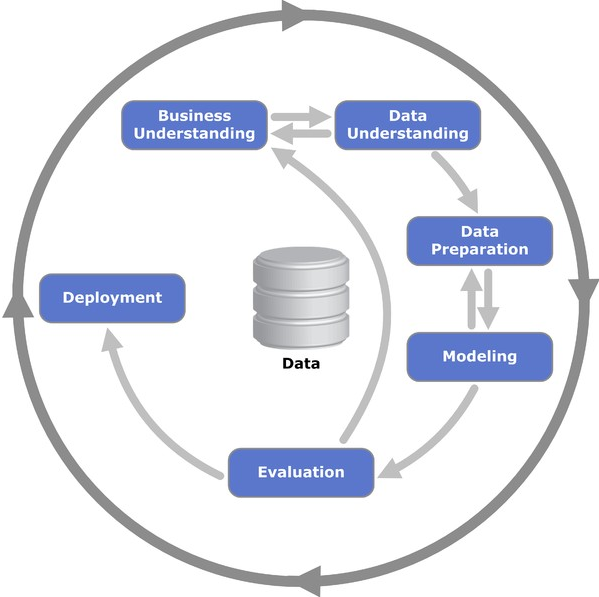

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/crisp_dm.png')

# Sumário pelo o método Crisp DM

1. Business Understanding
2. Data Understanding
3. Data preparation
4. Modeling
5. Evaluation: Interpretar resposta gráfica

### 1. Problema proposto: Propensão a compra de produto Bancário
 Preveja se o cliente do banco se inscreverá (1/yes) ou não (0/no) para um depósito a prazo. Este dataset foi originado das campanhas de marketing do banco português.

 Os dados foram fornecidos pelo Kaggle: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data

# 1.1 Objetivo:
 Utilizar os algoritimos supervisionados de Regressão Logística, Árvore de Decisão, Random Forest e XGBoost para classificar a probabilidade do cliente se inscrever ou não para um depósito a prezo

In [ ]:
# Bibliotecas usadas
#!pip install feature_engine
#!pip install category_encoders
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from category_encoders import TargetEncoder

# 2. Data Understanding

In [ ]:
# Importando e pré-visualizando os dados
import pandas as pd
dfpro_ban = pd.read_csv('/content/drive/MyDrive/prob_class_ProdutoBancario/bank-additional-full.csv',sep=";")

dfpro_ban.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Número de linhas e colunas
dfpro_ban.shape

(41188, 21)

In [ ]:
# Transformando dados para 1/0
dfpro_ban = dfpro_ban.replace({'yes':1,'no':0})

In [ ]:
dfpro_ban.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
# Análise das variáveis para tipos, nulos e cardinallidade
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe dados do banco
metadata_df = generate_metadata(dfpro_ban)
metadata_df

,nome_variavel,tipo,qt_nulos,cardinalidade
0,age,int64,0,78
1,previous,int64,0,8
2,pdays,int64,0,27
3,campaign,int64,0,42
4,duration,int64,0,1544
5,y,int64,0,2
6,nr.employed,float64,0,11
7,emp.var.rate,float64,0,10
8,cons.price.idx,float64,0,26
9,cons.conf.idx,float64,0,26


# 3. Data preparation

# 3.1 Split e preparação dos dados

In [ ]:
# Criando variável Target
abt = dfpro_ban.drop(columns=['y'])
target = dfpro_ban.y

X_train, X_test, y_train, y_test = train_test_split(abt,target,test_size=0.2,random_state=0)

In [ ]:
# Preparação dos dados

num_features_train = X_train.select_dtypes(exclude='object')
cat_features_train = X_train.select_dtypes(include='object')

num_features_test = X_test.select_dtypes(exclude='object')
cat_features_test = X_test.select_dtypes(include='object')

# Encoder
ce = TargetEncoder()

cat_features_train = ce.fit_transform(cat_features_train,y_train)
cat_features_test = ce.transform(cat_features_test,y_test)

X_train_01 = pd.concat([num_features_train,cat_features_train],axis=1)
X_test_01 = pd.concat([num_features_test,cat_features_test],axis=1)

# Scaler
scaler = StandardScaler()

X_train_02 = scaler.fit_transform(X_train_01)
X_test_02 = scaler.transform(X_test_01)

colunas = num_features_train.columns.to_list()+cat_features_train.columns.to_list()

X_train_02 = pd.DataFrame(X_train_02,columns=colunas)
X_test_02 = pd.DataFrame(X_test_02,columns=colunas)

# 3.2 Seleção de Variáveis


In [ ]:
# Remover variáveis constantes

threshold = 0

selector = VarianceThreshold(threshold)
selector.fit_transform(X_train_02)

# Colunas selecionadas
selected_features = abt.columns[selector.get_support()]

# Colunas descartadas
discarded_features = abt.columns[~selector.get_support()]

# Manter apenas features selecionadas
X_train_select01 = X_train_02[selected_features]
X_test_select01 = X_test_02[selected_features]

X_train_select01.shape[1]

20

In [ ]:
# Remover variáveis altamente correlacionadas
def remove_highly_correlated_features(df, threshold):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select the upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identify columns to drop based on the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop the columns
    df_reduced = df.drop(columns=to_drop)

    return df_reduced, to_drop


df_reduced, dropped_features = remove_highly_correlated_features(X_train_select01, threshold=0.9)
print(dropped_features)

X_train_select02 = X_train_select01.drop(columns=dropped_features)
X_test_select02 = X_test_select01.drop(columns=dropped_features)

['poutcome', 'euribor3m', 'nr.employed']


# 3.3 Selecionar variáveis baseado na importância para o modelo

In [ ]:
# Selecionar variáveis baseado na importância para o modelo

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_select02, y_train)

# Obter importância das variáveis
feature_importances = rf.feature_importances_
features = pd.DataFrame({
    'Feature': X_train_select02.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.1

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X_train_select02.columns[feature_importances > cutoff].tolist()

X_train_select03 = X_train_select02[selected_features]
X_test_select03 = X_test_select02[selected_features]

# 4. Modeling

4.1 Regressão Logística

4.2 Árvore de Decisão

4.3 Random Forest

4.4 XGBoost

#5. Avaliação
#A função a seguir, apresenta as métricas usadas para avaliar os modelos utilizados no trabalho, são elas:


*   Taxa de evento e não evento (distribução de eventos negativos e positivos)
*   Importância das variáveis (contribuição de cada variável no modelo)
*   Matriz de Confusão (desempenho em erdadeiros positivos (TP), verdadeiros negativos (TN), falsos positivos (FP) e falsos negativos (FN))
*   Curva ROC (ilustra a relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (1 - especificidade) para vários pontos de corte na escala de probabilidade de um modelo)
*   Índice Gini (critério para avaliar a impureza dos dados durante o processo)
*   Estatística KS ( diferença máxima entre as funções de distribuição acumulada de eventos e não eventos, avaliando assim a capacidade de discriminação do modelo)
*   Score Ordenado ( ordenação das instâncias ou observações com base em um score atribuída pelo modelo)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score


def calcular_ks_statistic(y_true, y_score):
    df = pd.DataFrame({'score': y_score, 'target': y_true})
    df = df.sort_values(by='score', ascending=False)
    total_events = df.target.sum()
    total_non_events = len(df) - total_events
    df['cum_events'] = df.target.cumsum()
    df['cum_non_events'] = (df.target == 0).cumsum()
    df['cum_events_percent'] = df.cum_events / total_events
    df['cum_non_events_percent'] = df.cum_non_events / total_non_events
    ks_statistic = np.abs(df.cum_events_percent - df.cum_non_events_percent).max()
    return ks_statistic


def avaliar_modelo(X_train, y_train, X_test, y_test, modelo, nm_modelo):

    feature_names = list(X_train.columns)
    # Criação da figura e dos eixos
    fig, axs = plt.subplots(5, 2, figsize=(15, 30))  # Ajustado para incluir novos gráficos
    plt.tight_layout(pad=6.0)

    # Cor azul claro
    cor = 'skyblue'

    # Taxa de Evento e Não Evento
    event_rate = np.mean(y_train)
    non_event_rate = 1 - event_rate
    axs[0, 0].bar(['Evento', 'Não Evento'], [event_rate, non_event_rate], color=[cor, 'lightcoral'])
    axs[0, 0].set_title('Taxa de Evento e Não Evento')
    axs[0, 0].set_ylabel('Proporção')

    # Importância dos Atributos
    importancias = None
    if hasattr(modelo, 'coef_'):
        importancias = np.abs(modelo.coef_[0])
    elif hasattr(modelo, 'feature_importances_'):
        importancias = modelo.feature_importances_

    if importancias is not None:
        importancias_df = pd.DataFrame({'feature': feature_names, 'importance': importancias})
        importancias_df = importancias_df.sort_values(by='importance', ascending=True)

        axs[0, 1].barh(importancias_df['feature'], importancias_df['importance'], color=cor)
        axs[0, 1].set_title('Importância das Variáveis - ' + nm_modelo)
        axs[0, 1].set_xlabel('Importância')

    else:
        axs[0, 1].axis('off')  # Desativa o subplot se não houver importâncias para mostrar

    # Confusion Matrix - Treino
    y_pred_train = modelo.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    axs[1, 0].imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    axs[1, 0].set_title('Confusion Matrix - Treino - ' + nm_modelo)
    axs[1, 0].set_xticks([0, 1])
    axs[1, 0].set_yticks([0, 1])
    axs[1, 0].set_xticklabels(['0', '1'])
    axs[1, 0].set_yticklabels(['0', '1'])
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        axs[1, 0].text(j, i, format(cm_train[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")

    # Confusion Matrix - Teste
    y_pred_test = modelo.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    axs[1, 1].imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    axs[1, 1].set_title('Confusion Matrix - Teste - ' + nm_modelo)
    axs[1, 1].set_xticks([0, 1])
    axs[1, 1].set_yticks([0, 1])
    axs[1, 1].set_xticklabels(['0', '1'])
    axs[1, 1].set_yticklabels(['0', '1'])
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        axs[1, 1].text(j, i, format(cm_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")

    # ROC Curve - Treino e Teste
    y_score_train = modelo.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    axs[2, 0].plot(fpr_train, tpr_train, color=cor, label='Treino')

    y_score_test = modelo.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
    axs[2, 0].plot(fpr_test, tpr_test, color='darkorange', label='Teste')

    axs[2, 0].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axs[2, 0].set_title('ROC Curve - Treino e Teste - ' + nm_modelo)
    axs[2, 0].set_xlabel('False Positive Rate')
    axs[2, 0].set_ylabel('True Positive Rate')
    axs[2, 0].legend(loc="lower right")

    # Gini - Treino e Teste
    auc_train = roc_auc_score(y_train, y_score_train)
    gini_train = 2 * auc_train - 1
    auc_test = roc_auc_score(y_test, y_score_test)
    gini_test = 2 * auc_test - 1
    axs[3, 0].bar(['Treino', 'Teste'], [gini_train, gini_test], color=[cor, 'darkorange'])
    axs[3, 0].set_title('Gini - ' + nm_modelo)
    axs[3, 0].set_ylim(0, 1)
    axs[3, 0].text('Treino', gini_train + 0.01, f'{gini_train:.2f}', ha='center', va='bottom')
    axs[3, 0].text('Teste', gini_test + 0.01, f'{gini_test:.2f}', ha='center', va='bottom')

    # KS - Treino e Teste
    ks_train = calcular_ks_statistic(y_train, y_score_train)
    ks_test = calcular_ks_statistic(y_test, y_score_test)
    axs[3, 1].bar(['Treino', 'Teste'], [ks_train, ks_test], color=[cor, 'darkorange'])
    axs[3, 1].set_title('KS - ' + nm_modelo)
    axs[3, 1].set_ylim(0, 1)
    axs[3, 1].text('Treino', ks_train + 0.01, f'{ks_train:.2f}', ha='center', va='bottom')
    axs[3, 1].text('Teste', ks_test + 0.01, f'{ks_test:.2f}', ha='center', va='bottom')


    # Decile Analysis - Teste
    scores = modelo.predict_proba(X_test)[:, 1]
    noise = np.random.uniform(0, 0.0001, size=scores.shape)  # Adiciona um pequeno ruído
    scores += noise
    deciles = pd.qcut(scores, q=10, duplicates='drop')
    decile_analysis = y_test.groupby(deciles).mean()
    axs[4, 1].bar(range(1, len(decile_analysis) + 1), decile_analysis, color='darkorange')
    axs[4, 1].set_title('Ordenação do Score - Teste - ' + nm_modelo)
    axs[4, 1].set_xlabel('Faixas de Score')
    axs[4, 1].set_ylabel('Taxa de Evento')

    # Decile Analysis - Treino
    scores_train = modelo.predict_proba(X_train)[:, 1]
    noise = np.random.uniform(0, 0.0001, size=scores_train.shape)  # Adiciona um pequeno ruído
    scores_train += noise
    deciles_train = pd.qcut(scores_train, q=10, duplicates='drop')
    decile_analysis_train = y_train.groupby(deciles_train).mean()
    axs[4, 0].bar(range(1, len(decile_analysis_train) + 1), decile_analysis_train, color=cor)
    axs[4, 0].set_title('Ordenação do Score - Treino - ' + nm_modelo)
    axs[4, 0].set_xlabel('Faixas de Score')
    axs[4, 0].set_ylabel('Taxa de Evento')

    # Mostrar os gráficos
    plt.show()

## 4.1 Primeiro teste: Regressão logística

---


A Regressão Logística é um método estatístico utilizado para modelar a relação entre uma variável dependente binária e uma ou mais variáveis independentes. Diferentemente da regressão linear, que prevê um valor contínuo, a regressão logística lida com a probabilidade de um evento ocorrer e é, portanto, adequada para problemas de classificação. Na regressão logística, a transformação logit da probabilidade de um evento é modelada como uma combinação linear das variáveis independentes, ou seja

$ \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_kx_k $


onde $ p $ é a probabilidade do evento de interesse, $ \beta_0, \beta_1, \ldots, \beta_k $ são os coeficientes a serem estimados, e $ x_1, x_2, \ldots, x_k $ são as variáveis independentes. A probabilidade $ p $ é então obtida por meio da função logística inversa

$ p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_kx_k)}} $,

resultando em valores entre 0 e 1, que podem ser convertidos em classificações binárias, com base em um limiar, comumente 0,5.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Definindo o modelo
model = LogisticRegression(max_iter=100)
model_sgs = LogisticRegression(max_iter=100)

# Definindo os parâmetros para o grid search
param_grid = {
    'penalty':['l1','l2'],
    'tol':[0.00001,0.0001,0.001],
    'C': [1.0, 2.0],
    'solver':['liblinear', 'saga'],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 2, 1: 1}]
}



# Calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['penalty']) * len(param_grid['tol']) * len(param_grid['C']) * len(param_grid['solver']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train_select03, y_train)

# treinando modelo sem grid search para comparar
model_sgs.fit(X_train_select03, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test_select03)

best_model_rl = grid.best_estimator_

Total de Modelos a serem Treinados: 120
Melhores Parâmetros:  {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}
Melhor AUC:  0.9313513586997244


# 5.1 Avaliação modelo Regressão Logística

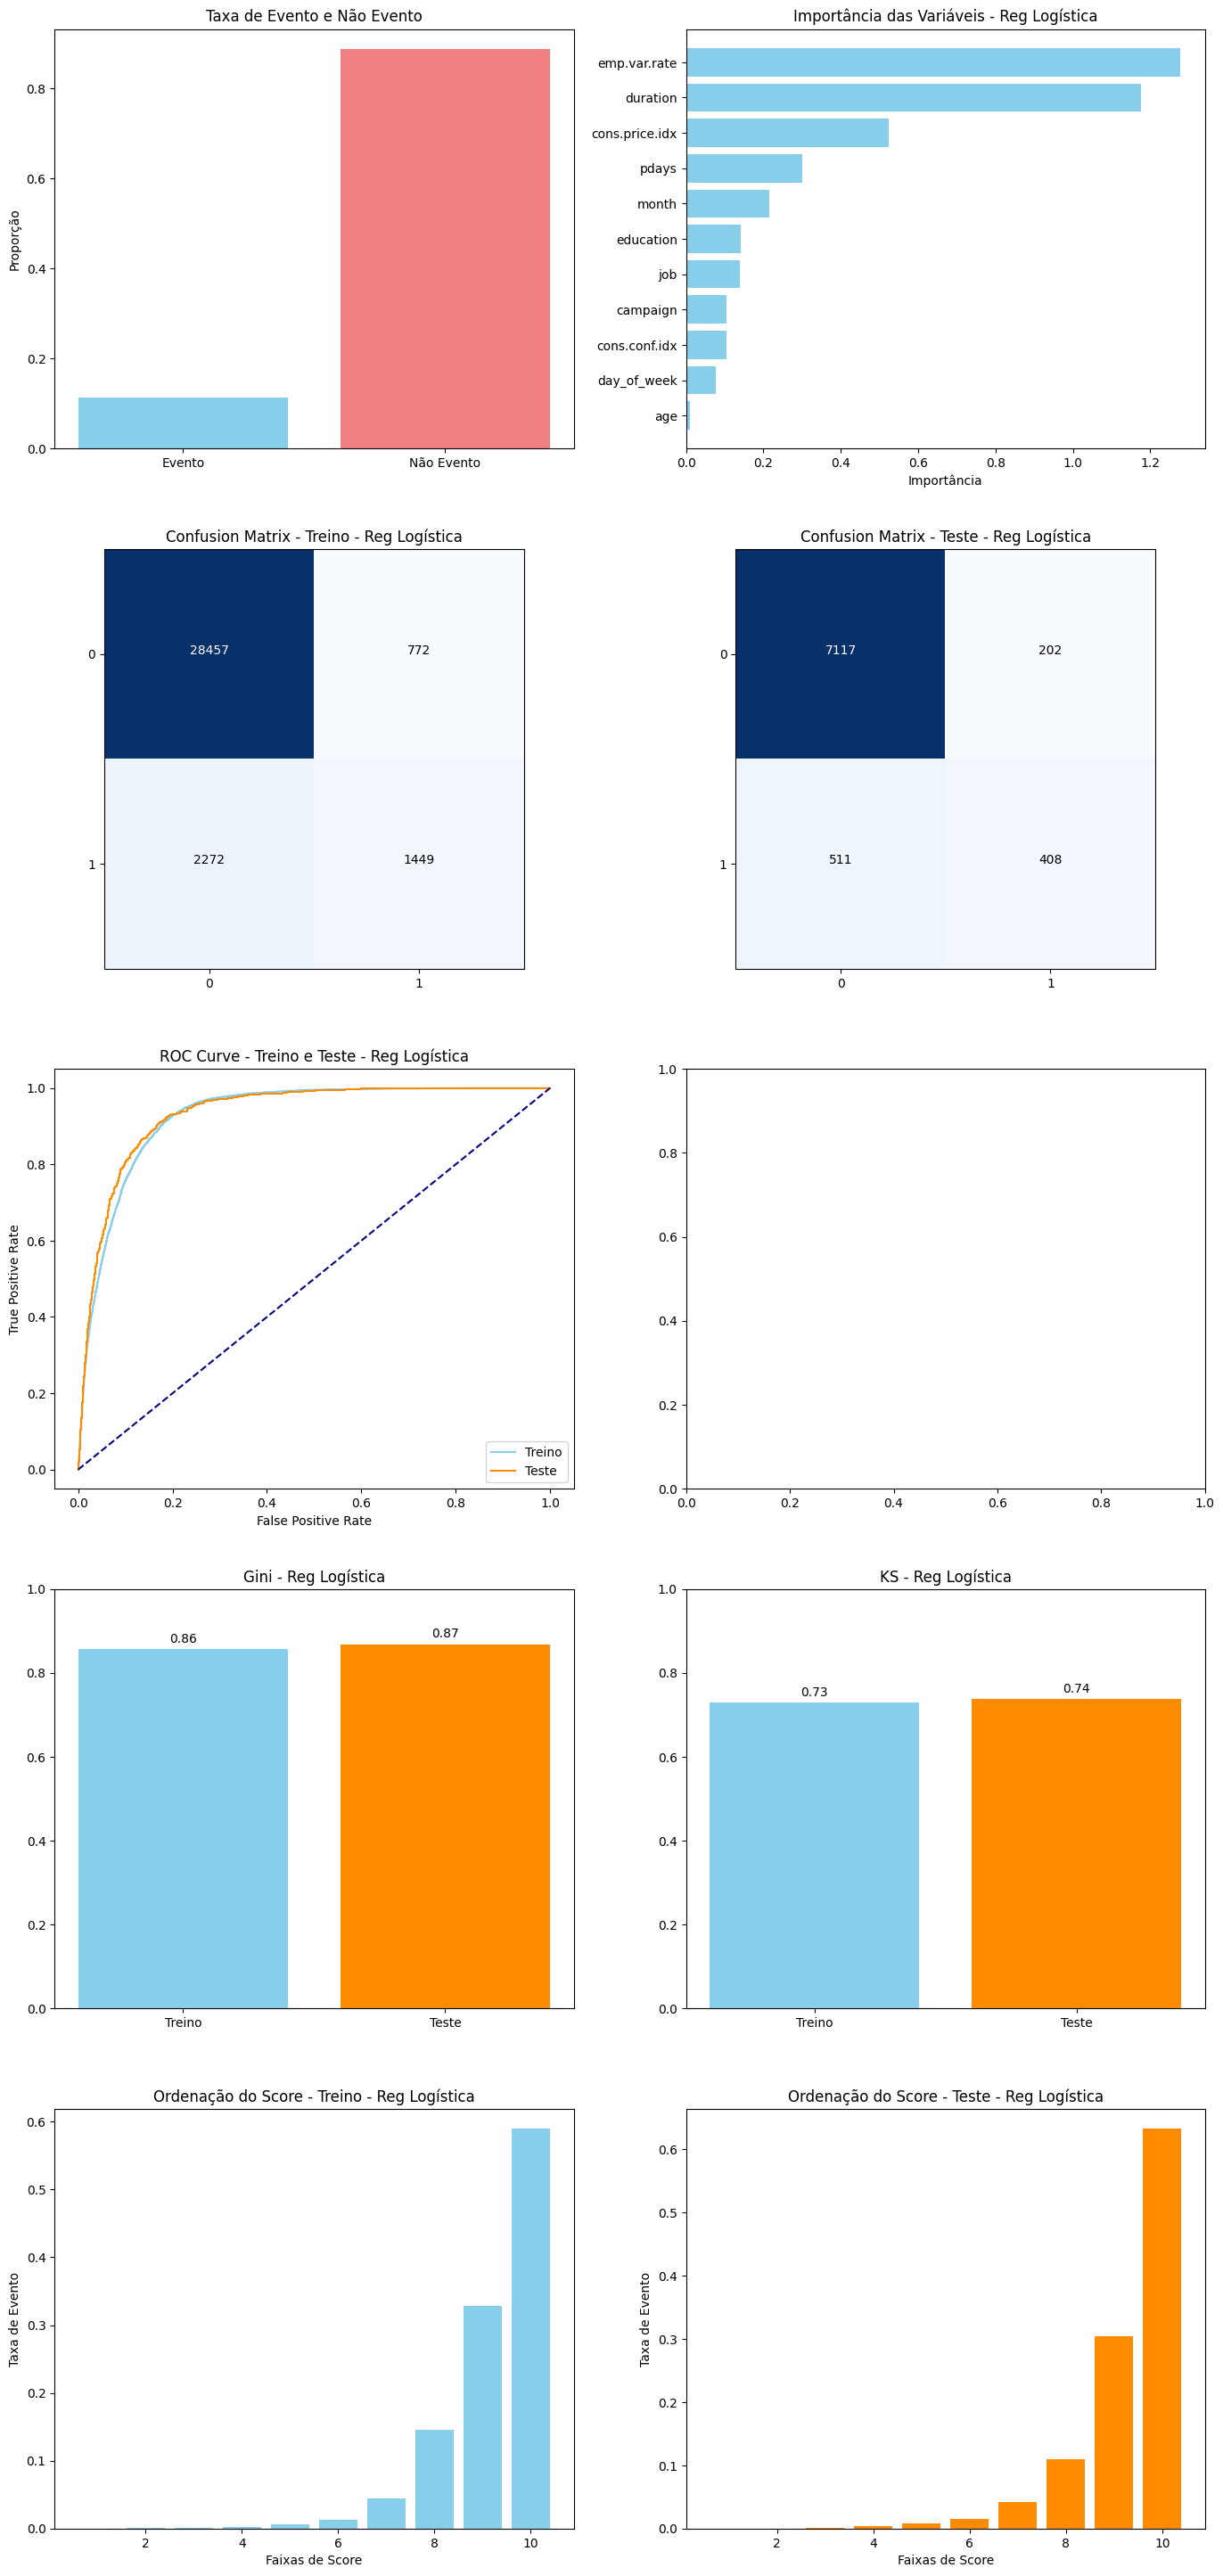

In [ ]:
avaliar_modelo(X_train_select03, y_train, X_test_select03, y_test, model_sgs,nm_modelo='Reg Logística')

# 4.2 Segundo teste: Árvore de Decisão
* Também utilizados em modelos de classificação, elas são estruturas de árvores hierárquicas que representam decisões e suas possíveis consequências.
A árvore é composta por nós, onde cada nó representa uma decisão ou teste em uma característica específica.Os nós de decisão levam a outros nós ou folhas, que representam as previsões ou valores de saída do modelo para as instâncias que alcançam essa folha.

* Uma das principais vantagens das árvores de decisão é a sua interpretabilidade. É fácil entender as decisões tomadas em cada nó da árvore, tornando-as úteis para explicar o raciocínio do modelo aos usuários ou partes interessadas.

* Árvores de decisão têm uma propensão natural para o overfitting, ou seja, ajustar muito bem aos dados de treinamento, o que pode levar a um desempenho inferior em dados não vistos. Estratégias como a poda da árvore ou limitação da profundidade podem ser usadas para mitigar o overfitting.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definindo o modelo
model = DecisionTreeClassifier(random_state=42)

# Definindo os parâmetros para o grid search
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [2,3,4], # Profundidade máxima da árvore
    'min_samples_split': [0.008, 0.01,0.02,0.04], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.008,0.02,0.04], # Número mínimo de amostras necessárias para estar em um nó folha.
}

# Calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['splitter']) * len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train_select03, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test_select03)

best_model_dt = grid.best_estimator_

Total de Modelos a serem Treinados: 720
Melhores Parâmetros:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 0.008, 'min_samples_split': 0.008, 'splitter': 'best'}
Melhor AUC:  0.9206258478034808


# 5.2 Avalliação do modelo Arvore de Decisão

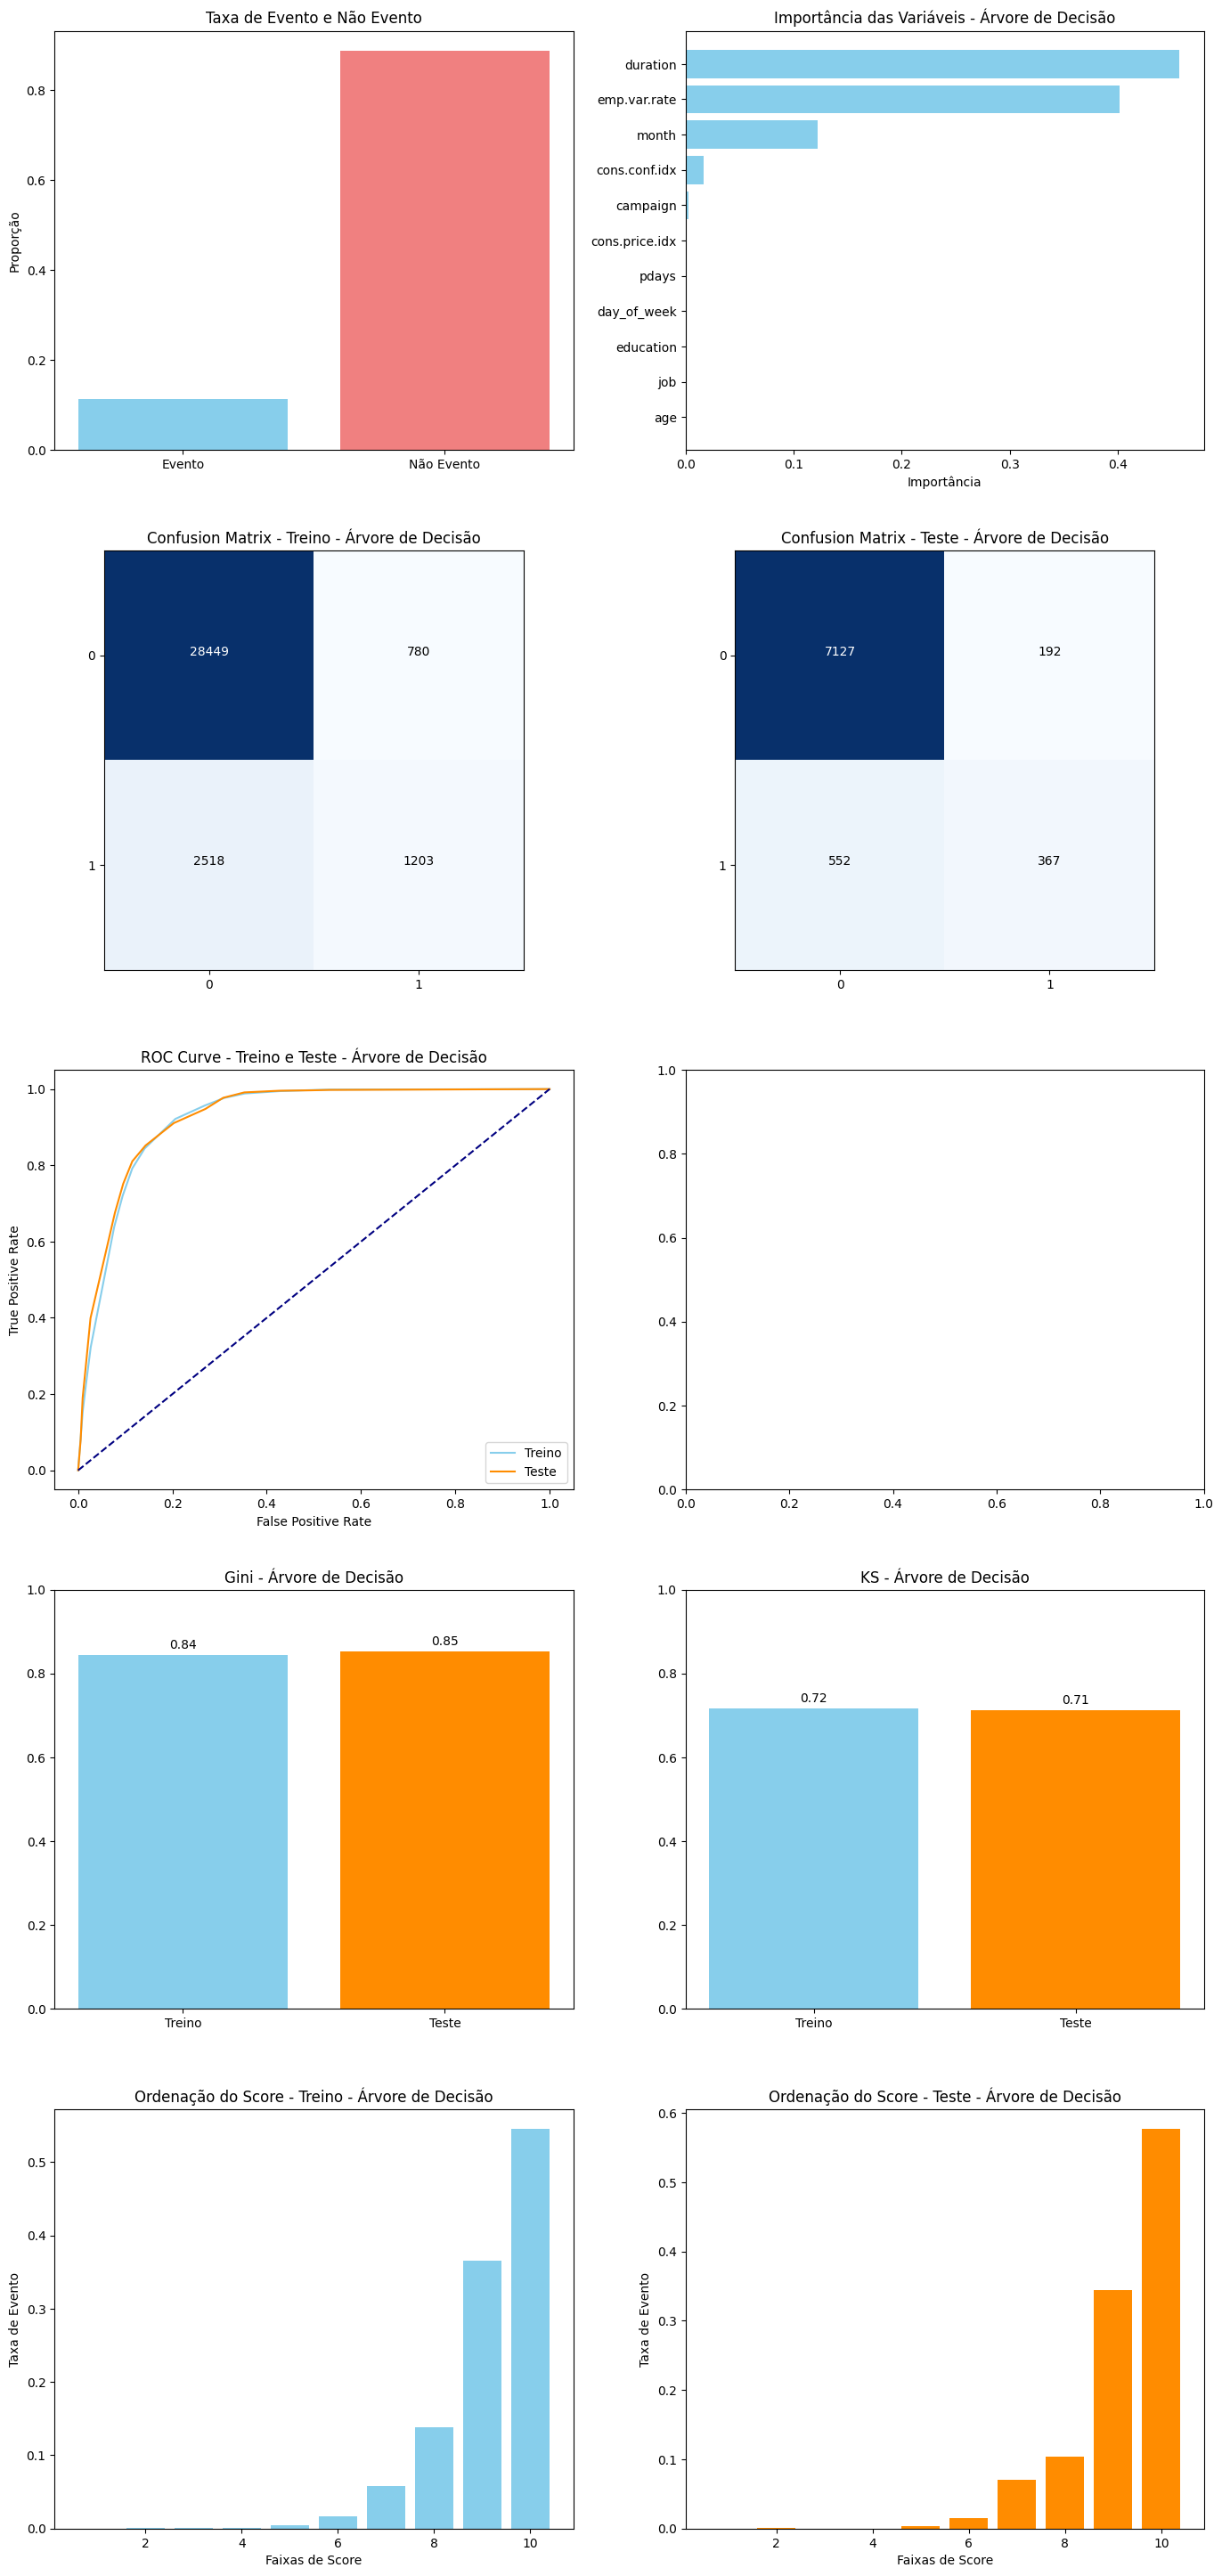

In [ ]:
avaliar_modelo(X_train_select03, y_train, X_test_select03, y_test, best_model_dt,nm_modelo='Árvore de Decisão')

# 4.3 Terceiro teste: Random Forest

Baseado em árvores de decisão que utiliza técnicas de ensemble. O termo "ensemble" refere-se à ideia de combinar vários modelos individuais para criar um modelo mais robusto e geral.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definindo o modelo
model = RandomForestClassifier()

# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [2, 3, 5],
    'min_samples_split': [0.001, 0.01],
    'min_samples_leaf': [2, 0.01],
    'bootstrap': [True, False],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train_select03, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test_select03)

best_model_rf = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 0.001, 'n_estimators': 50}
Melhor AUC:  0.9340822739818913


# 5.3 Avalliação do modelo Random Forest

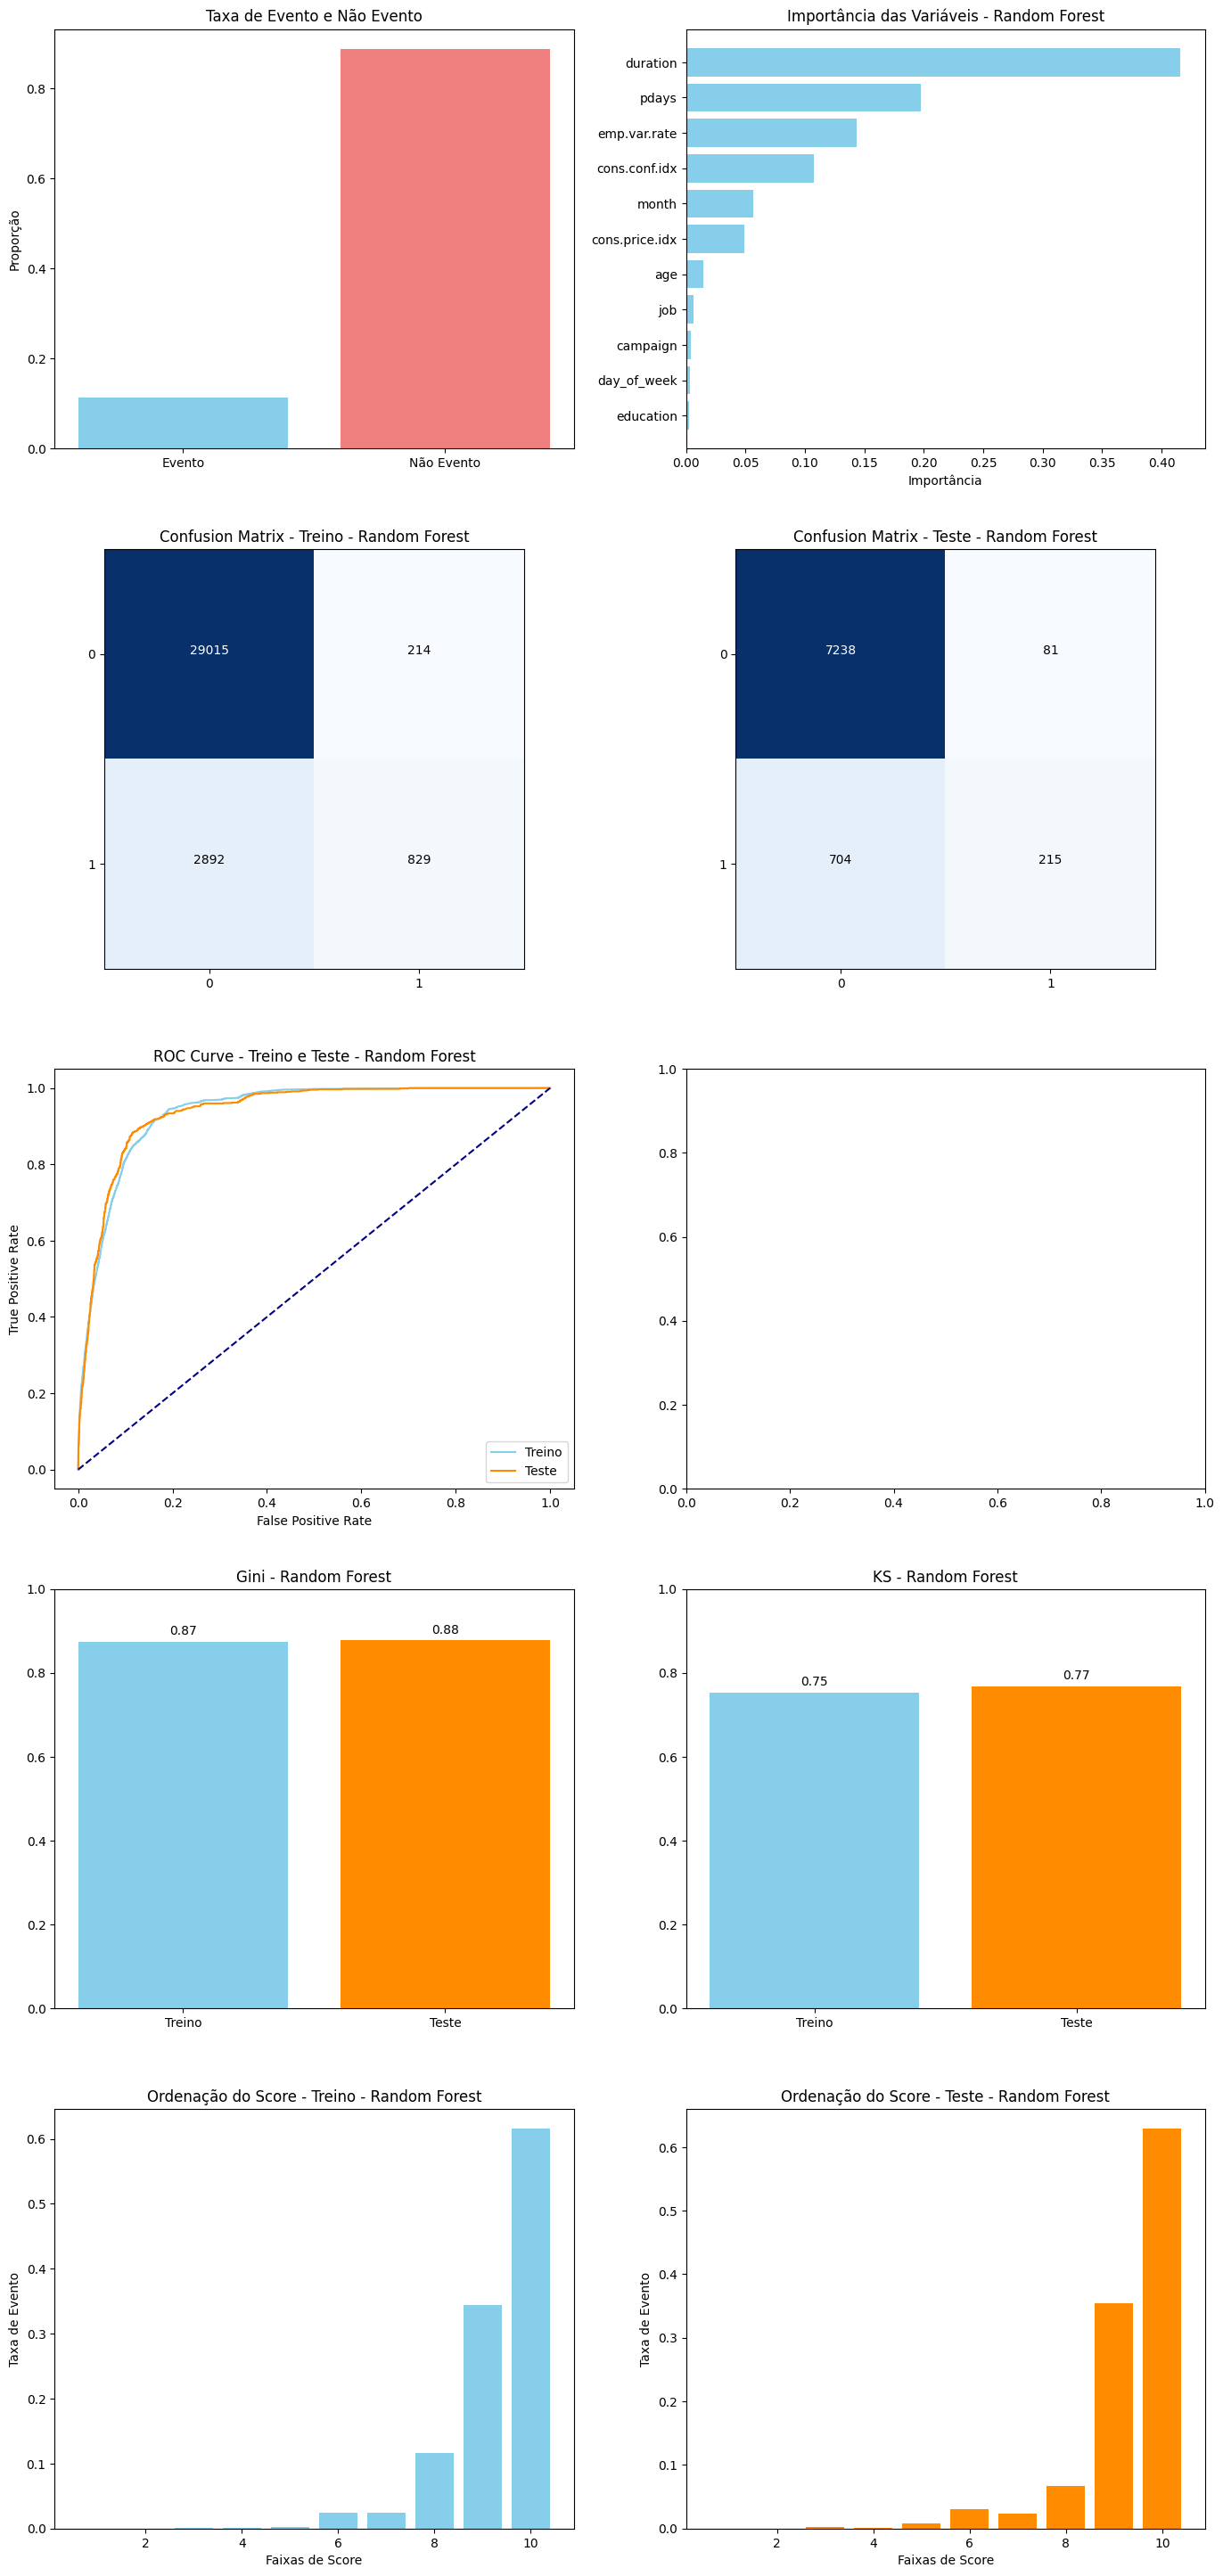

In [ ]:
avaliar_modelo(X_train_select03, y_train, X_test_select03, y_test, best_model_rf,nm_modelo='Random Forest')

# 4.4 Quarto teste: XGBoost

"eXtreme Gradient Boosting", é uma implementação eficiente e otimizada do algoritmo de Gradient Boosting. Assim como o Random Forest, o XGBoost é um método de ensemble, mas difere em alguns aspectos chave, especialmente em como constrói e combina árvores.



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir o modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


# Definindo os parâmetros para o grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [10, 100]
}

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train_select03, y_train)


# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test_select03)

best_model_xgbm = grid.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Melhores Parâmetros:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Melhor AUC:  0.9451327940701155


# 5.4 Avalliação do modelo XGBoost

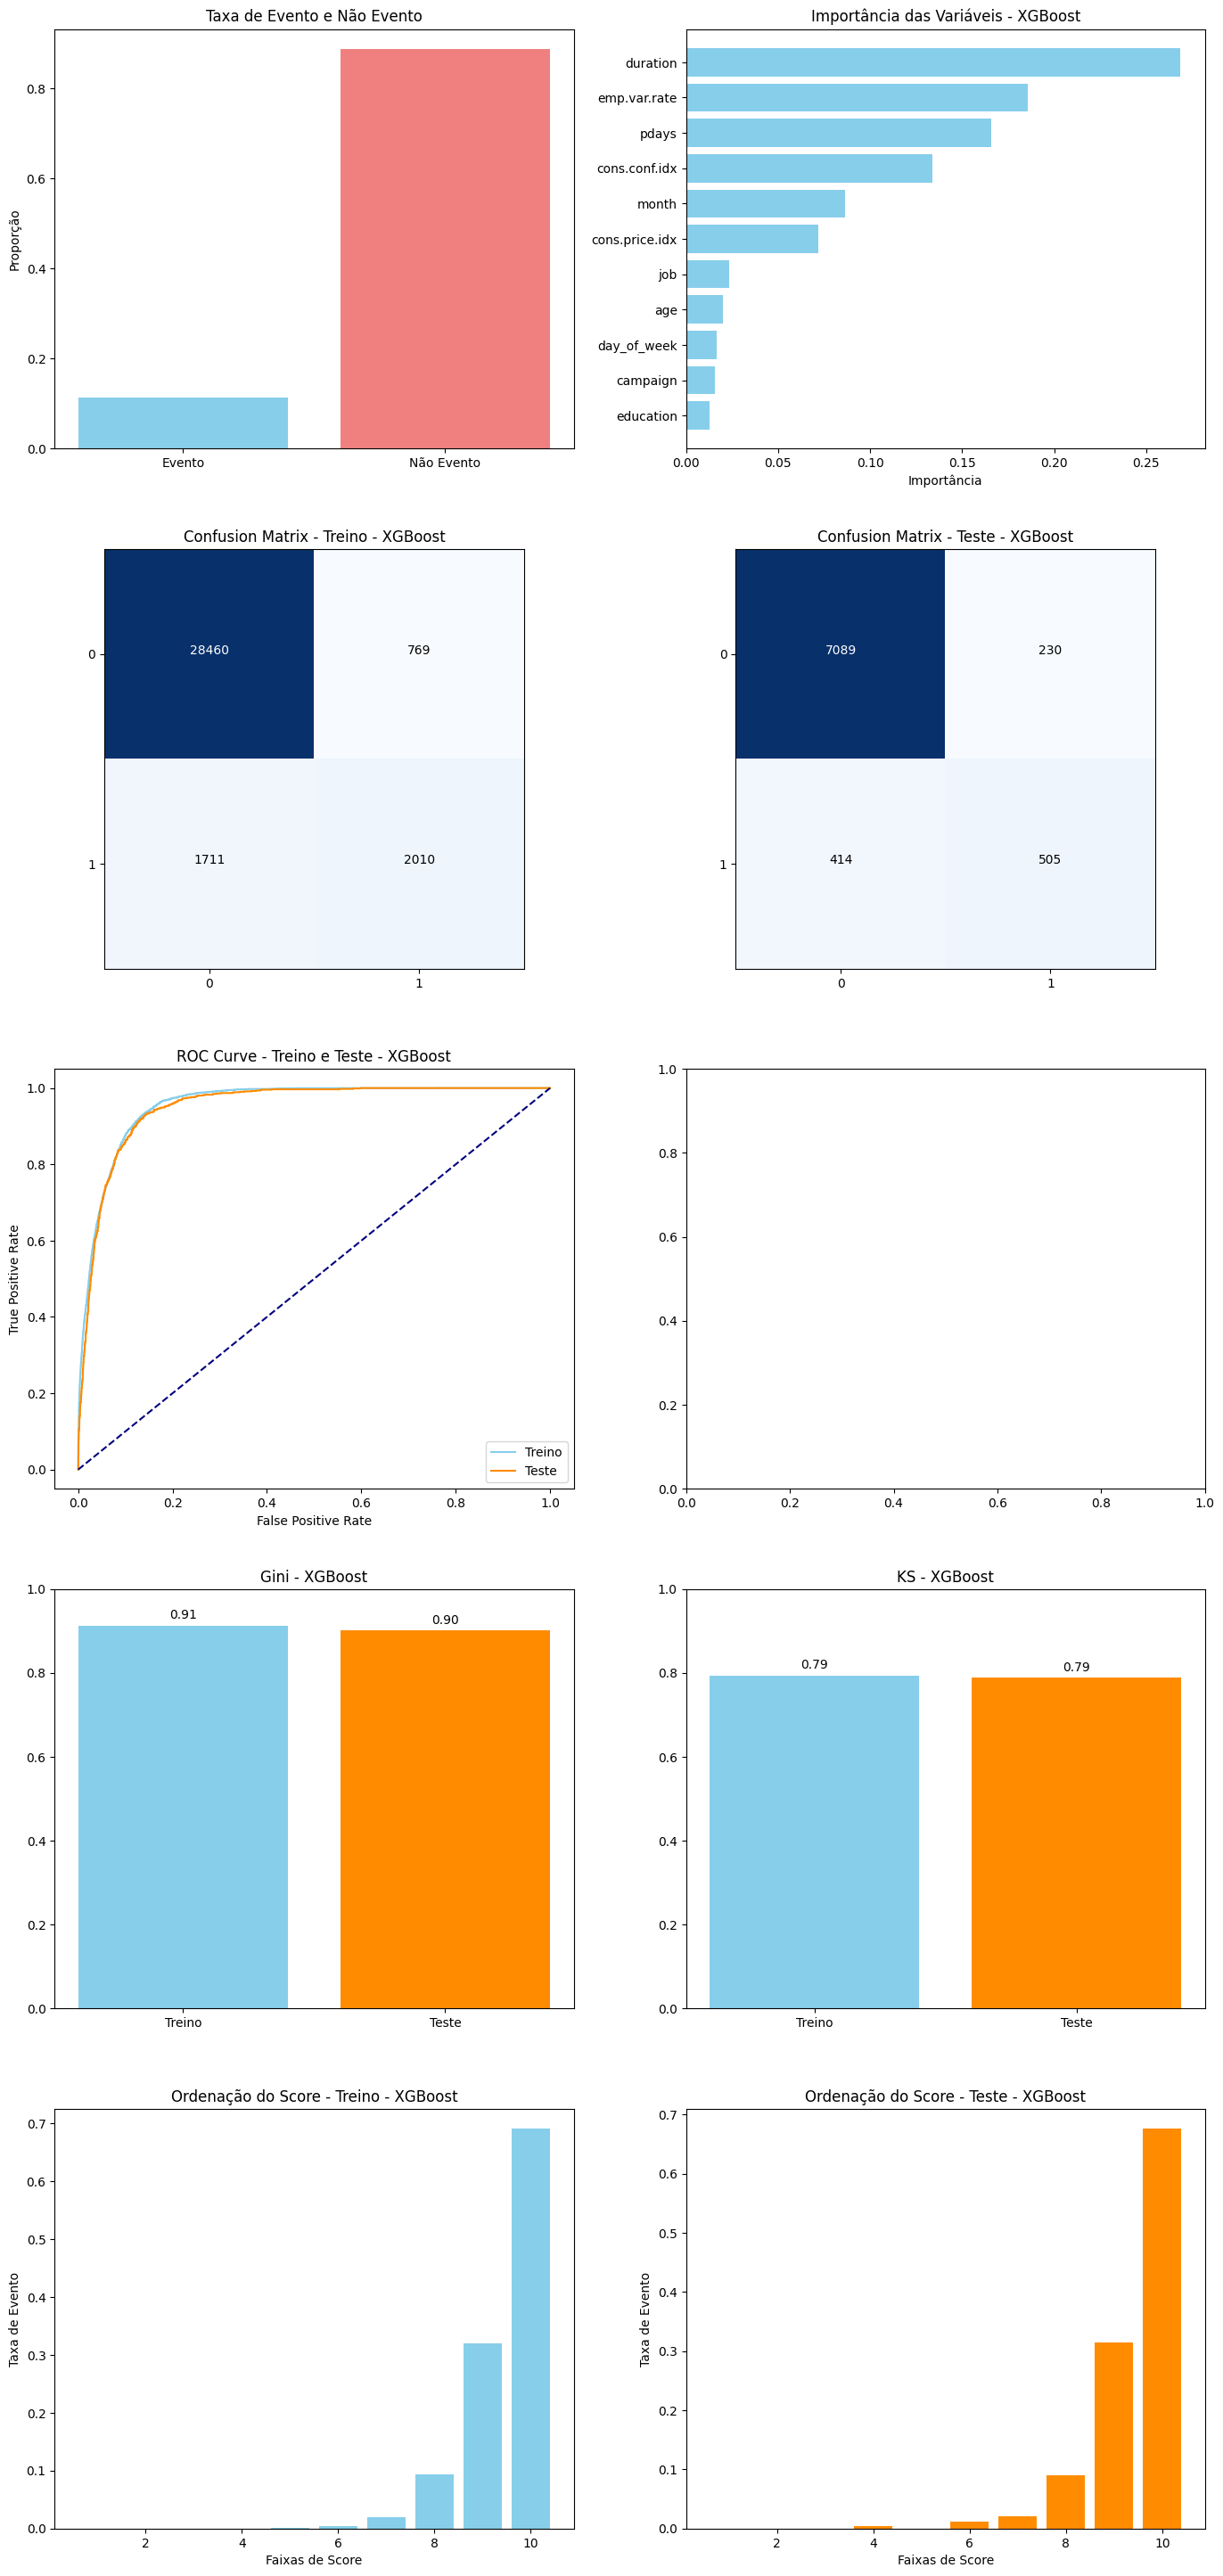

In [ ]:
avaliar_modelo(X_train_select03, y_train, X_test_select03, y_test, best_model_xgbm,nm_modelo='XGBoost')